In [1]:
import torch

import tr_util
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
default_path = 'results/min_tree_ppo/node/'
# default_path = 'results/min_tree_ppo/node_cuda/'
agent_path = '250413_2117#n50_e918_g50_g_3-2_correl'
correl_path = f'{default_path}{agent_path}'

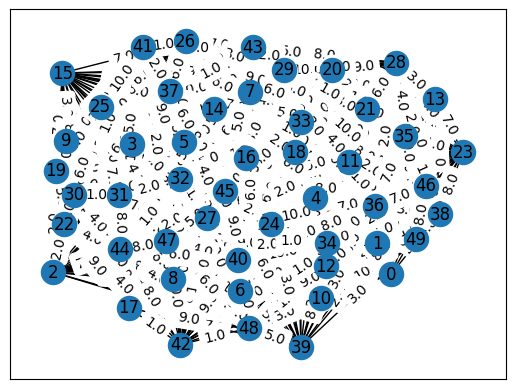

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
iter,,,,,,,,,,,,,,,,,,,,,
0,128,132,119,133,124,126,137,129,127,137,...,129,127,111,125,125,117,128,140,134,137
1,119,122,116,135,128,126,123,140,137,127,...,138,128,120,114,120,119,125,120,124,114
2,110,125,107,128,110,138,104,128,131,129,...,136,114,140,121,118,127,121,132,124,128
3,127,112,115,133,117,139,114,115,133,138,...,124,134,107,124,128,121,124,127,128,141
4,114,121,121,114,135,120,111,118,138,128,...,127,130,129,127,127,122,131,126,119,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,105,128,113,123,126,137,119,122,133,114,...,128,122,123,136,127,129,120,124,119,155
73,120,122,124,129,119,131,136,131,126,112,...,128,127,117,120,111,115,128,124,114,126
74,129,138,127,141,115,125,108,120,128,128,...,116,129,109,115,145,123,122,134,118,126


In [5]:
actions_df = pd.read_csv(f'{correl_path}/actions_debug.csv', index_col=0)
# graph = torch.load(f'{correl_path}/graph.pt', weights_only=False)
graph = torch.load(f'graphs/graph50_n50_e1225_corr.pt', weights_only=False)
util.show_data(graph)
actions_df

In [6]:
degrees = util.get_out_edges(graph)
torch.stack([graph.x[:, 0], degrees])

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
         14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
         28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
         42., 43., 44., 45., 46., 47., 48., 49.],
        [33., 40., 31., 40., 36., 42., 35., 36., 38., 35., 38., 38., 40., 32.,
         41., 29., 43., 32., 39., 39., 39., 35., 39., 36., 46., 35., 35., 44.,
         35., 37., 35., 34., 44., 36., 35., 37., 34., 37., 37., 29., 40., 33.,
         28., 36., 37., 36., 36., 42., 34., 38.]])

In [11]:

degrees.unique().shape

torch.Size([17])

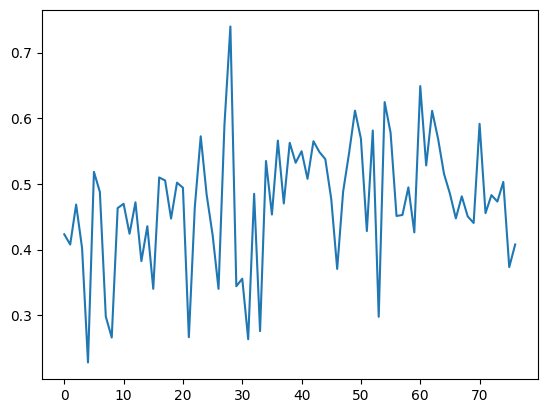

In [12]:


correlations = []
for _, row in actions_df.iterrows():
    corr, _ = pearsonr(degrees, row)
    correlations.append(corr)
plt.plot(correlations)

In [13]:
correlations[0]

0.4234287221619946